In [69]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

In [70]:
records = list(SeqIO.parse("aln-fasta", "fasta"))
Chaserr=records[0].seq
CHASERR=records[1].seq

In [71]:
#alignment dictionaries
mouse_align=dict()
human_align=dict()
human_coord=1
mouse_coord=1
for i in range(len(CHASERR)):
    if CHASERR[i]!="-":
        human_align[human_coord]=i+1
        human_coord+=1
    if Chaserr[i]!="-":
        mouse_align[mouse_coord]=i+1
        mouse_coord+=1

In [74]:
def plot_sites_prob(rna_sites_file_txt,chaserr_align,caption_name):
    #rna_sites_file_txt - rnaup sites filename to work with
    #chaserr_align - alignment dictionary, also giving info of isoform/ortolog length
    #caption_name - filename for distribution caption, referring caption name, e.g. "chaserr_sites.png"
    rnaup_df=pd.read_csv(rna_sites_file_txt,delimiter="\t")
    full_seq=dict()
    for i in range(1,len(chaserr_align)+1):
        full_seq[i]=0
    for i in range(1,len(rnaup_df)+1):
        for j in range(rnaup_df["siteStart1"][i],rnaup_df["siteEnd1"][i]):
            full_seq[j]+=-abs(rnaup_df["deltaG"][i])*np.log(rnaup_df["Pvalue"][i])/rnaup_df["siteLen"][i]
    f, ax = plt.subplots(figsize=(20,8))
    width=1
    plt.bar(full_seq.keys(), full_seq.values(), width, color='g')
    plt.savefig(caption_name)

In [85]:
def plot_local_sites_prob(rna_sites_file_txt,chaserr_align,caption_name,local_start,local_end):
    #rna_sites_file_txt - rnaup sites filename to work with
    #chaserr_align - alignment dictionary, also giving info of isoform length
    #caption_name - filename for distribution caption, referring caption name, e.g. "chaserr_sites.png"
    #local_start and local_end - desirable region of analysis
    rnaup_df=pd.read_csv(rna_sites_file_txt,delimiter="\t")
    full_seq=dict()
    for i in range(1,len(chaserr_align)+1):
        full_seq[i]=0
    for i in range(1,len(rnaup_df)+1):
        for j in range(rnaup_df["siteStart1"][i],rnaup_df["siteEnd1"][i]):
            full_seq[j]+=-abs(rnaup_df["deltaG"][i])*np.log(rnaup_df["Pvalue"][i])/rnaup_df["siteLen"][i]
    local_region={key:full_seq[key] for key in range(local_start,local_end+1)}
    f, ax = plt.subplots(figsize=(20,8))
    width=1
    plt.bar(local_region.keys(), local_region.values(), width, color='g')
    plt.savefig(caption_name)

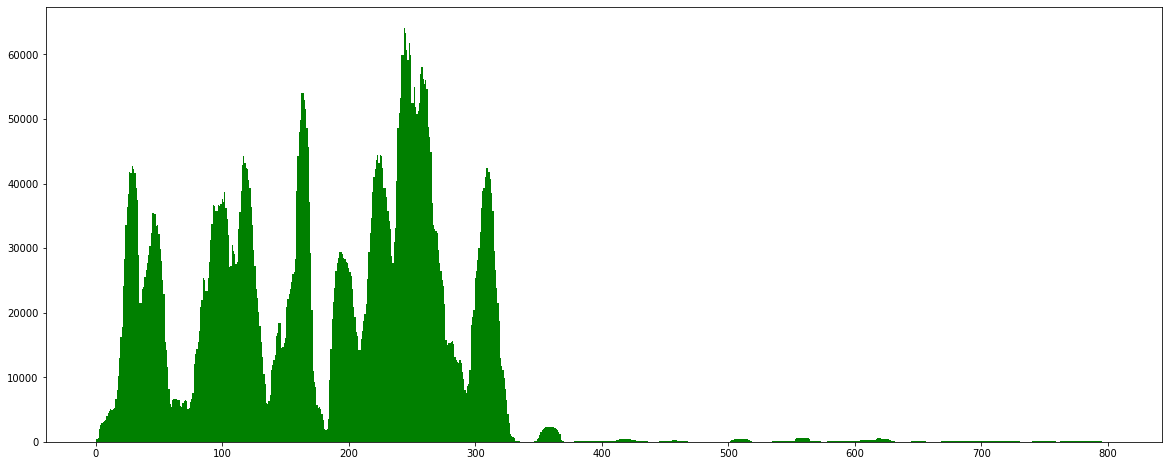

In [76]:
plot_sites_prob("hg_sites_07_only_values.txt",human_align,"CHASERR_07_sites.png")

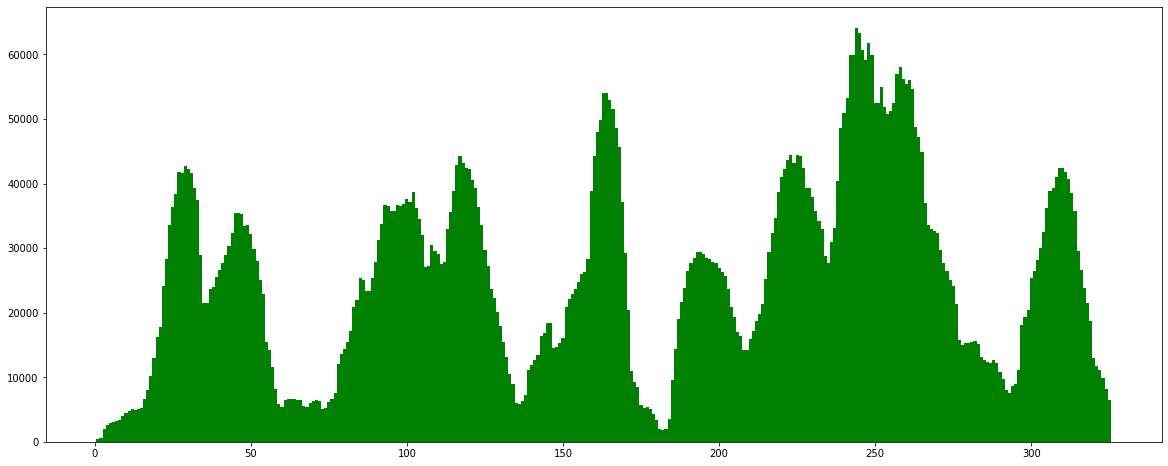

In [86]:
plot_local_sites_prob("hg_sites_07_only_values.txt",human_align,"CHASERR_07_sites_first_exon.png",1,325)

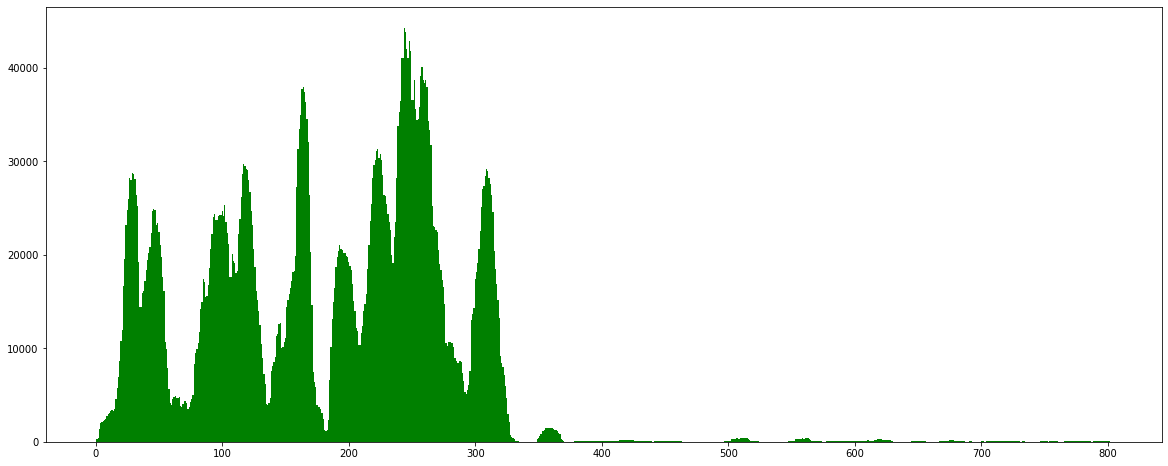

In [77]:
plot_sites_prob("hg_sites_10_only_values.txt",human_align,"CHASERR_10_sites.png")

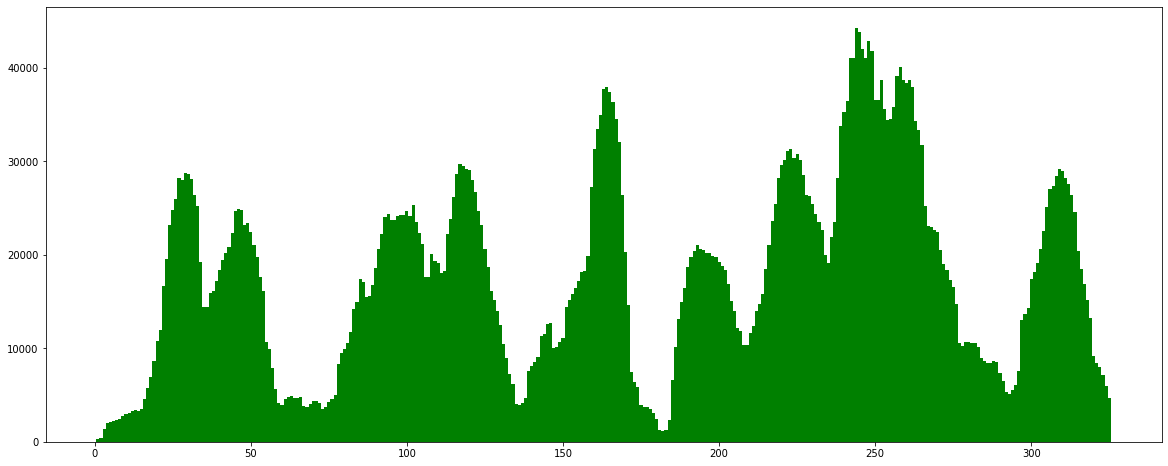

In [87]:
plot_local_sites_prob("hg_sites_10_only_values.txt",human_align,"CHASERR_10_sites_first_exon.png",1,325)

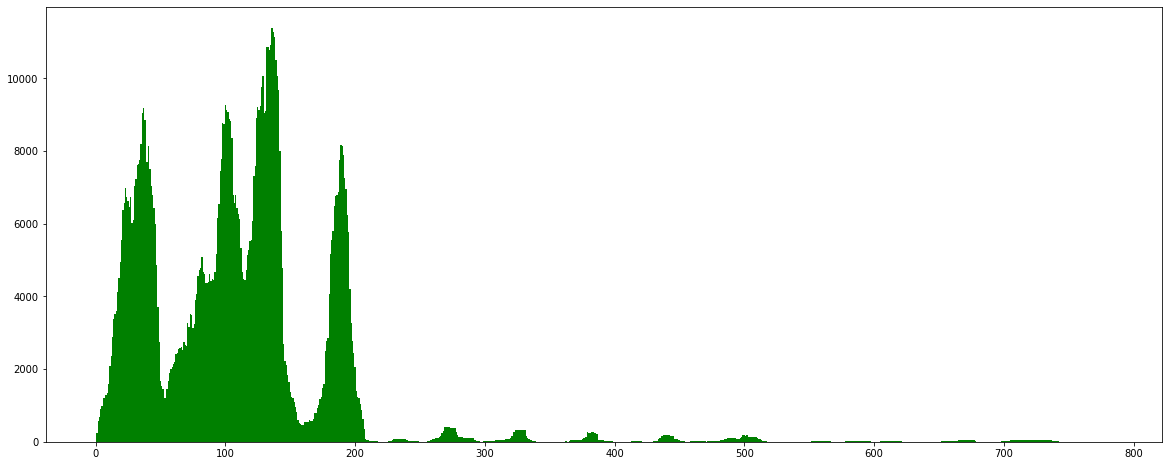

In [83]:
plot_sites_prob("rnaup_sites_07_only_values.txt",mouse_align,"Chaserr_07_mm_sites.png")

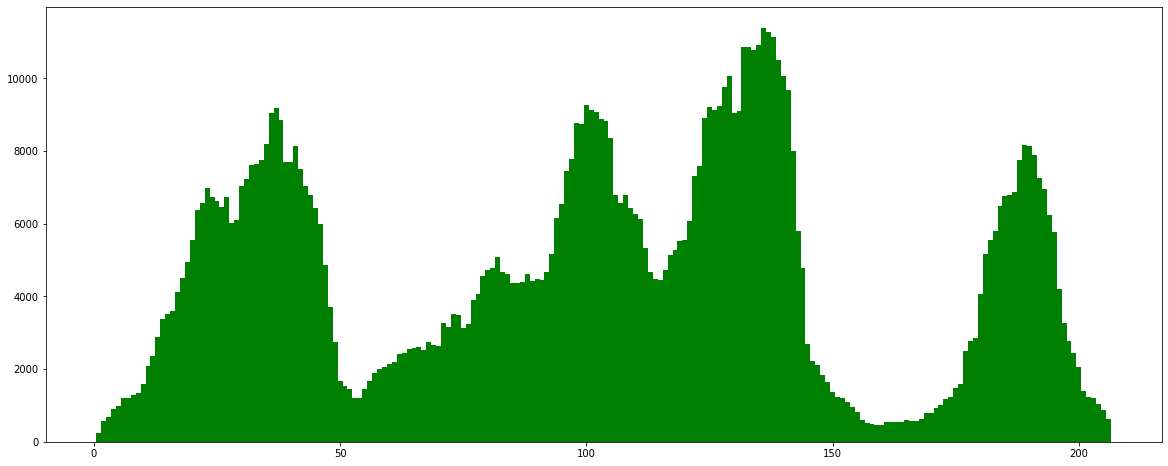

In [88]:
plot_local_sites_prob("rnaup_sites_07_only_values.txt",mouse_align,"Chaserr_07_mm_sites_first_exon.png",1,206)

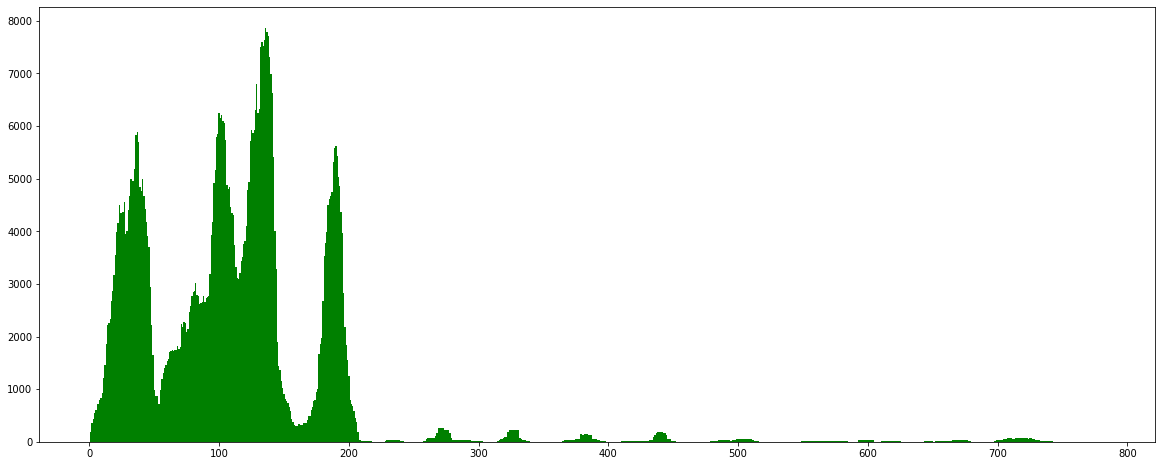

In [84]:
plot_sites_prob("rnaup_sites_10_only_values.txt",mouse_align,"Chaserr_10_mm_sites.png")

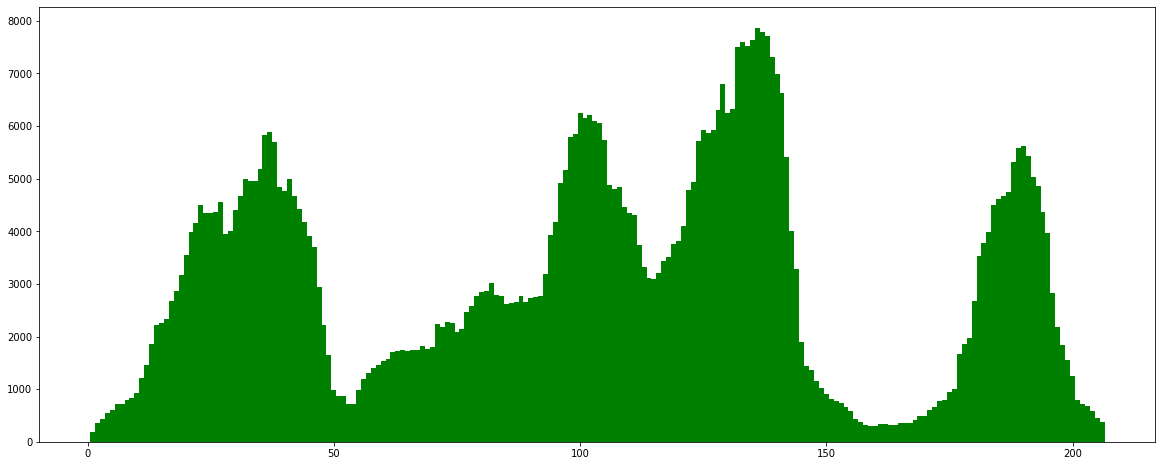

In [89]:
plot_local_sites_prob("rnaup_sites_10_only_values.txt",mouse_align,"Chaserr_10_mm_sites_first_exon.png",1,206)

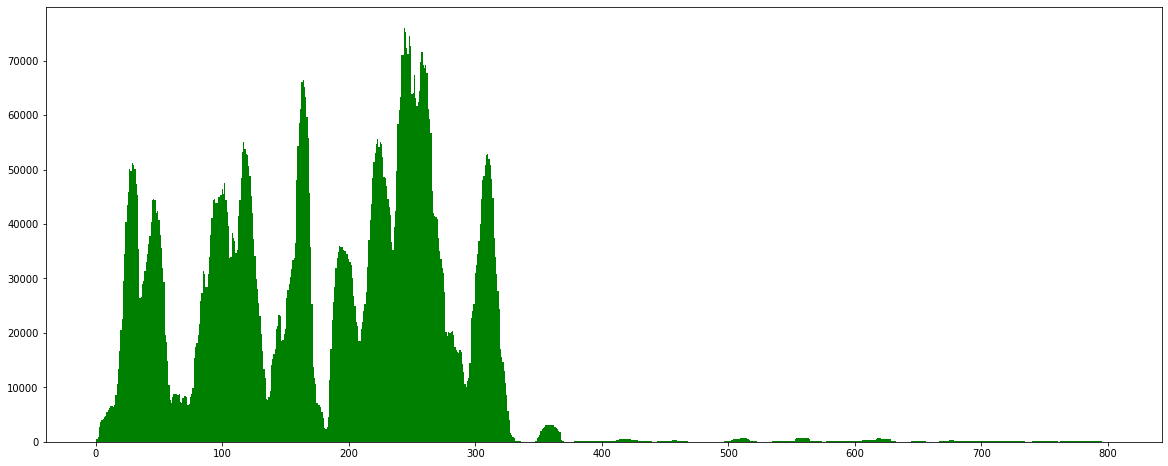

In [81]:
plot_sites_prob("rnaup_total_human.txt",human_align,"CHASERR_total_sites.png")

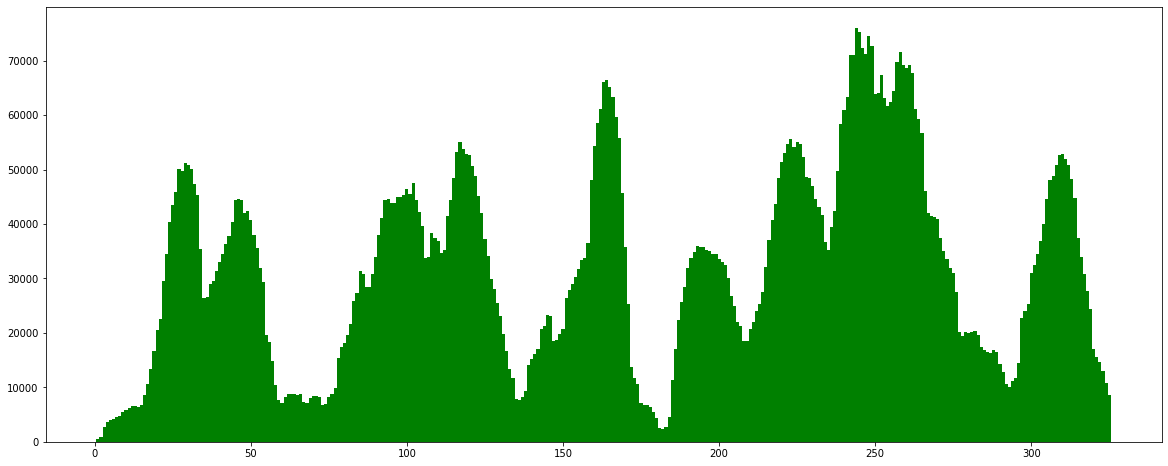

In [90]:
plot_local_sites_prob("rnaup_total_human.txt",human_align,"CHASERR_total_sites_first_exon.png",1,325)

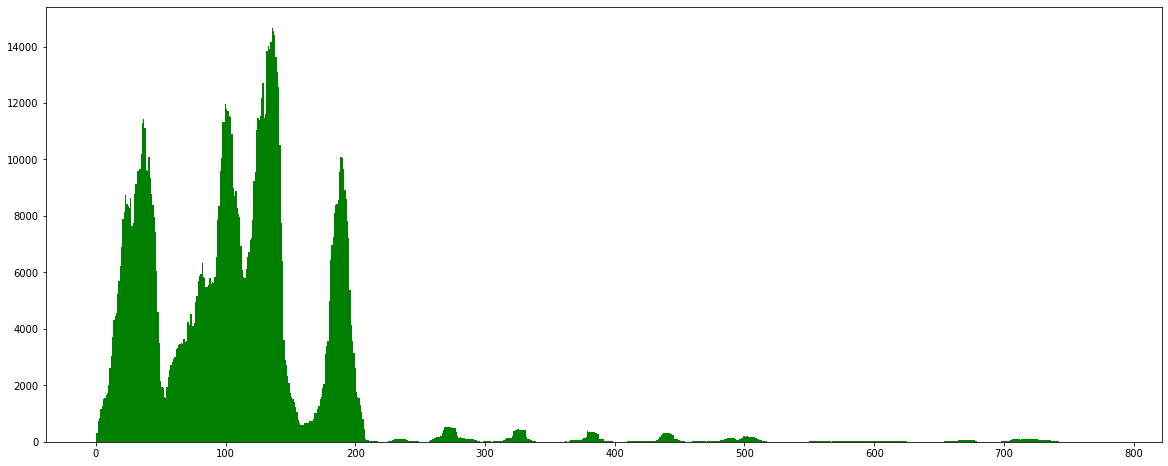

In [82]:
plot_sites_prob("rnaup_total_mouse.txt",mouse_align,"Chaserr_mm_total_sites.png")

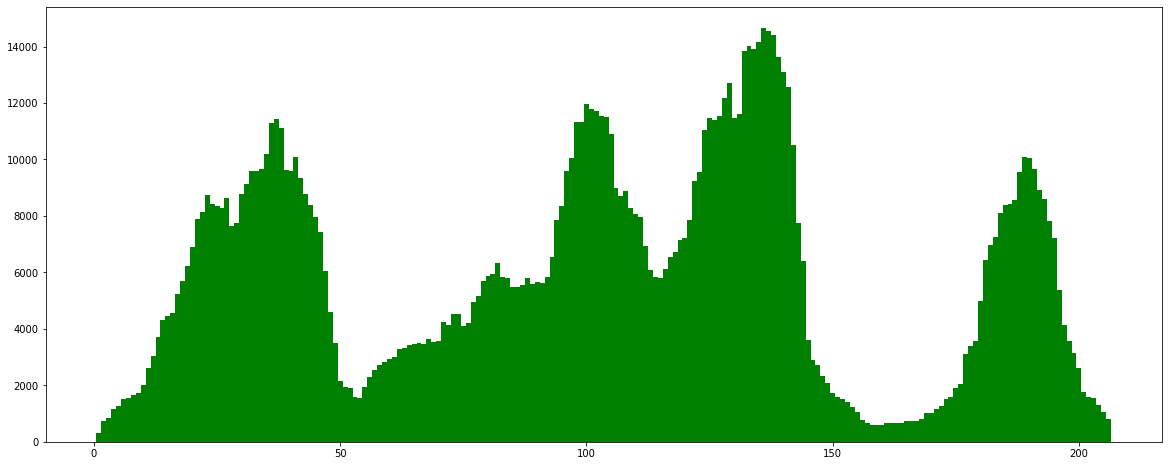

In [91]:
plot_local_sites_prob("rnaup_total_mouse.txt",mouse_align,"Chaserr_mm_total_sites_first_exon.png",1,206)

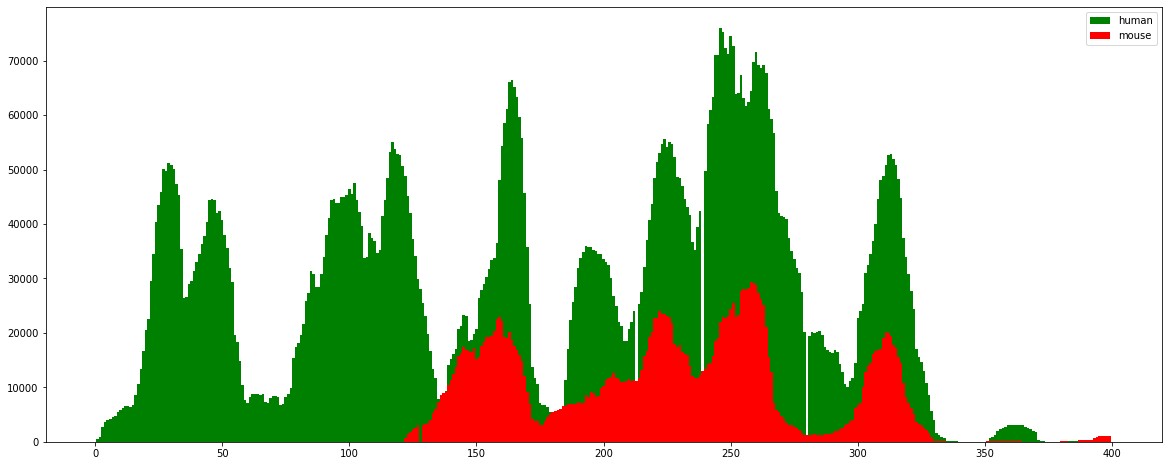

In [94]:
rnaup_human=pd.read_csv("rnaup_total_human.txt",delimiter="\t")
rnaup_mouse=pd.read_csv("rnaup_total_mouse.txt",delimiter="\t")
human_seq=dict()
mouse_seq=dict()
for i in range(1,len(CHASERR)+1):
    human_seq[i]=0
    mouse_seq[i]=0
for i in range(1,len(rnaup_human)+1):
    for j in range(rnaup_human["siteStart1"][i],rnaup_human["siteEnd1"][i]):
        human_seq[human_align[j]]+=-abs(rnaup_human["deltaG"][i])*np.log(rnaup_human["Pvalue"][i])/rnaup_human["siteLen"][i]
for i in range(1,len(rnaup_mouse)+1):
    for j in range(rnaup_mouse["siteStart1"][i],rnaup_mouse["siteEnd1"][i]):
        mouse_seq[mouse_align[j]]+=-2*abs(rnaup_mouse["deltaG"][i])*np.log(rnaup_mouse["Pvalue"][i])/rnaup_mouse["siteLen"][i]
f, ax = plt.subplots(figsize=(20,8))
width=1
local_human={key:human_seq[key] for key in range(1,400)}
local_mouse={key:mouse_seq[key] for key in range(1,400)}
plt.bar(local_human.keys(), local_human.values(), width, color='g', label="human")
plt.bar(local_mouse.keys(), local_mouse.values(), width, color='r', label="mouse")
ax.legend(markerscale=3)
plt.savefig("alignment_first_exon.png")